Učitavamo podatke iz vehicles.csv

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv('vehicles.csv')

In [3]:
import seaborn as sns
sns.set()

df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Čitamo podatke, tipove podataka, i stupce koji postoje

In [4]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [73]:
df.shape

(426880, 26)

In [10]:
r=df.columns
for i in r:
    print(df[i].value_counts())

id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: count, Length: 426880, dtype: int64
url
https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html                     1
https://nh.craigslist.org/cto/d/troy-1998-dodge-ram-59-cummins/7313139418.html                      1
https://nh.craigslist.org/ctd/d/north-hampton-2012-hyundai-sante-fe-se/7313423023.html              1
https://nh.craigslist.org/ctd/d/derry-2008-chrysler-sebring-limited-all/7313423324.html             1
https://nh.craigslist.org/ctd/d/derry-2002-toyota-camry-low-miles/7313424533.html                   1
                                                                                                   ..
https://chicago.craigslist.org/chc/cto/d/pleasant-prairie-2015-f80-m3-700hp-many/7314655506.html    1
https://chicago.craigslist.org/wcl/cto/d/saint-charles-2013-f

Neki podaci koji su nam dostupni su pregenerični i od njih nebi imali previše koristi. Neki od njih su primjerice URL. Takve stupce izbacujemo iz analize.

In [5]:
df= df.drop(columns=['id','url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long','county','region'], axis=1)


In [6]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN


In [7]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


Promotrimo numeričke vrijednosti: cijena, kolometraža i godine. Želimo izbaciti outliere ukoliko je to moguće.

Prvo promotrimo cijenu automobila. Razlika između 75% i max je dosta velika. Stoga za outliere uzimamo 10%.

In [8]:
rr=sorted(df["price"])
q1, q3= np.percentile(rr,[10,90])
print(q1,q3)

500.0 37590.0


In [9]:
df=df[(df.price < 37590) & (df.price >= 500 )]
df.shape

(341976, 16)

Promotrimo sada kilometražu.

In [10]:
r=sorted(df["odometer"])
r

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

Vidimo da postoje nan i 0.0 vrijednosti. 

In [11]:
df["odometer"].isna().sum()

1889

Provjerimo koliko je 0.

In [12]:
df.shape

(341976, 16)

In [13]:
df.groupby('odometer')['odometer'].agg(len)

odometer
0.0            960
1.0           1619
2.0             37
3.0             19
4.0             19
              ... 
9099999.0        1
9750924.0        1
9876543.0        1
9999999.0       61
10000000.0      32
Name: odometer, Length: 91084, dtype: int64

In [14]:
(960/341976)*100

0.2807214541371324

Izbacujemo podatke gdje je kilometraža 0.

In [15]:
df.drop(df[df["odometer"]==0.0].index,inplace=True)

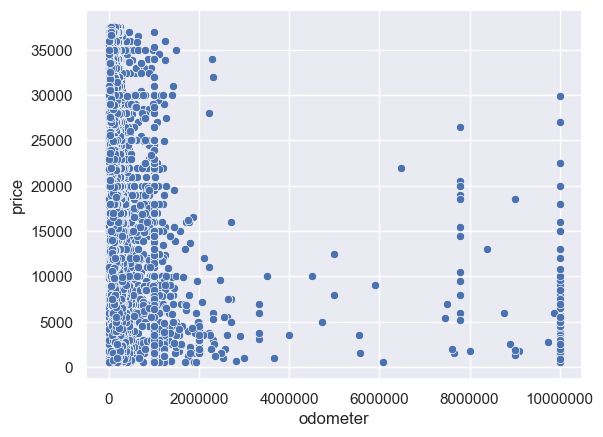

In [16]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [17]:
df["odometer"].describe()

count    3.391270e+05
mean     1.051852e+05
std      2.007940e+05
min      1.000000e+00
25%      4.630300e+04
50%      9.566200e+04
75%      1.410205e+05
max      1.000000e+07
Name: odometer, dtype: float64

Ovdje sve iznad 4000000 smatramo outlierima. 

In [18]:
df=df[(df.odometer < 4000000)]

In [19]:
df["odometer"].isna().sum()

0

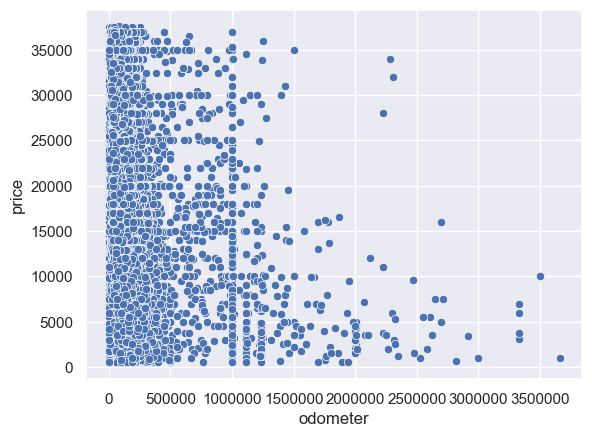

In [20]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

Promotrimo sada godine. 

In [21]:
df["year"].isna().sum()

564

In [22]:
df.shape

(338989, 16)

In [23]:
(564/338989) * 100

0.16637708008224456

Malo podataka ima null vrijednosti pa njih izbacujemo.

In [24]:
df=df.dropna(subset=['year'])

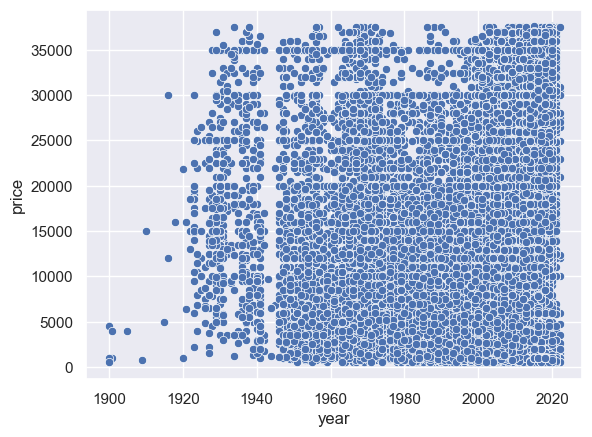

In [25]:
bx = sns.scatterplot(x="year", y="price", data=df)
bx.get_xaxis().get_major_formatter().set_scientific(False)
bx.get_yaxis().get_major_formatter().set_scientific(False)

Izbacili smo outliere iz sve tri numeričke kategorije.

Sada se želimo pozabaviti null vrijednostima. Računamo postotak null vrijednosti u kategorijama.

In [26]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,23720500,70.091
cylinders,13607000,40.207
condition,12318300,36.399
drive,10423400,30.800
paint_color,9813500,28.998
type,7470500,22.074
manufacturer,1225400,3.621
title_status,569800,1.684
model,376300,1.112
fuel,193200,0.571


In [27]:
df.condition.value_counts()

condition
good         105003
excellent     85256
like new      17194
fair           6548
new             696
salvage         545
Name: count, dtype: int64

Stanje automobila ja povezano i sa prijeđenom kilometražom. Stoga vrijednosti koje nedostaju možemo nadopuniti pomoću
kilometraže. Tražimo mean kilometraže po kategorijama stanja.

In [28]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [29]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 88816.93
Excellent average odometer: 111346.28
Good average odometer: 86513.58
Fair average odometer: 175840.51
Salvage average odometer: 182356.17


Sada ovim vrijednostima možemo nadopuniti nedostajeće null vrijednosti u stanjima automobila.

In [30]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

In [31]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [32]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,23720500,70.091
cylinders,13607000,40.207
drive,10423400,30.800
paint_color,9813500,28.998
type,7470500,22.074
manufacturer,1225400,3.621
title_status,569800,1.684
model,376300,1.112
fuel,193200,0.571
transmission,128800,0.381


U kategorijama gdje je postotak null vrijednosti manji od 5 izbacujemo te podatke.

In [33]:
df=df.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])

Također izbacujemo podatke gdje je postotak null vrijednosti veći od 50. 

In [34]:
df=df.drop(["size"],axis=1)

In [35]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
cylinders,12627500,40.180
drive,9415800,29.961
paint_color,8712500,27.723
type,6814300,21.683
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000


Promotrimo broj cilindara.

In [36]:
df.groupby('cylinders')['cylinders'].agg(len).sort_values(ascending=False)

cylinders
6 cylinders     72573
4 cylinders     63849
8 cylinders     48044
5 cylinders      1460
10 cylinders      941
other             598
3 cylinders       457
12 cylinders       73
Name: cylinders, dtype: int64

Izračunajmo medijan cijena null vrijednosti.

In [37]:
missing = df['cylinders'].isnull()
price_missing = df.loc[missing, 'price']
price_missing.median()

16590.0

In [38]:
po_cilindrima = df.groupby('cylinders')['price'].median()

print(po_cilindrima)

cylinders
10 cylinders    17995.0
12 cylinders    10500.0
3 cylinders     10998.0
4 cylinders      9250.0
5 cylinders      6000.0
6 cylinders     13900.0
8 cylinders     16750.0
other           12995.0
Name: price, dtype: float64


Vidimo da je cijena najbliža onoj za 8 cilindara pa null vrijednosti mijenjamo sa 8.

In [39]:
df['cylinders'].fillna("8 cylinders", inplace=True)

In [40]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
drive,9415800,29.961
paint_color,8712500,27.723
type,6814300,21.683
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
cylinders,0,0.000
fuel,0,0.000


Promotrimo pogon i ponovimo postupak.

In [41]:
df.groupby('drive')['drive'].agg(len)

drive
4wd    88913
fwd    88499
rwd    42700
Name: drive, dtype: int64

In [42]:
missing = df['drive'].isnull()
price_missing = df.loc[missing, 'price']
price_missing.median()

13995.0

In [43]:
po_pogonu = df.groupby('drive')['price'].median()

print(po_pogonu)

drive
4wd    16995.0
fwd    10495.0
rwd    16870.0
Name: price, dtype: float64


Medijan je najbliži fwd što je i najčešće kod automobila pa nadopunjujemo tom informacijom.

In [44]:
df["drive"].fillna("fwd", inplace=True)

In [45]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
paint_color,8712500,27.723
type,6814300,21.683
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
cylinders,0,0.000
fuel,0,0.000
odometer,0,0.000


Promotrimo tip vozila i ponovimo postupak.

In [46]:
df.groupby('type')['type'].agg(len)

type
SUV            58488
bus              256
convertible     5738
coupe          13082
hatchback      13937
mini-van        4218
offroad          490
other          14368
pickup         30160
sedan          70250
truck          19547
van             6547
wagon           9046
Name: type, dtype: int64

In [47]:
missing = df['type'].isnull()
price_missing = df.loc[missing, 'price']
price_missing.median()

9500.0

In [48]:
po_tipu = df.groupby('type')['price'].median()

print(po_tipu)

type
SUV            13995.0
bus            14900.0
convertible    14900.0
coupe          16990.0
hatchback      14799.0
mini-van        7450.0
offroad        12500.0
other          24990.0
pickup         25990.0
sedan          10995.0
truck          18999.0
van            15525.0
wagon          13488.5
Name: price, dtype: float64


Medijan je najbliži sedanu pa nadopunjujemo tom informacijom.

In [49]:
df["type"].fillna("sedan", inplace=True)

In [50]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
paint_color,8712500,27.723
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
cylinders,0,0.000
fuel,0,0.000
odometer,0,0.000
title_status,0,0.000


Koristimo forward fill za nadopunjavanje boje automobila kako ne bismo izgubili taj podatak.

In [51]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')

Posting date nam stvara problem zbog oblika pa ga pretvaramo u broj dana umjesto datuma.

In [52]:
from datetime import datetime

df["posting_date"] = df["posting_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z").replace(tzinfo=None))
today = datetime.today()
df["posting_date"] = (today - df["posting_date"]).dt.days

In [53]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
title_status,0,0.0
transmission,0,0.0


In [54]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
posting_date    0
dtype: int64

In [55]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [56]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'posting_date'],
      dtype='object')

In [57]:
df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

In [58]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [59]:
y= df.price
X= df.drop('price',axis=1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(251416, 14) (251416,)
(62854, 14) (62854,)


In [62]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [63]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [64]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)

Mean Absolute Error: 1727.22
Mean Squared Error: 10048613.03
Root Mean Squared Error: 3169.95
89.92040876806719


In [134]:

import pickle
pickle.dump(regressor, open('models/final_prediction.pickle', 'wb'))